### Ejercicio 9:

Journal of Pharmaceutical Sciences presentó en 1991 un articulo sobre la fracción molar de un soluto a temperatura constante. También se midió la dispersión, $x_1$, la solubilidad en el enlace bipolar, $x_2$ y, la solubilidad del enlace de hidrogeno, $x_3$. (comentario: en el modelo y es el logaritmo negativo $pH = – log[aH+]$ de la fracción molar).  

a) Ajuste un modelo de regresión múltiple, pruebe H0: β0 = β1 = β2 = β3 = 0.  
b) ¿Los residuos de este primer modelo son satisfactorios?  
c) Gráfique los residuales en comparación con $x_1, x_2 \text{ y } x_3$ (tres gráficas).Haga análisis de una de estas tres graficas.    
d) Considere los modelos adicionales que compitan con el modelo anterior:  

Modelo 2: agregué $x_1^2, x_2^2, x_3^2$   
Modelo 3: agregue $x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3$  
f) También valide estos dos últimos modelos  
g) Determine cual es el más idóneo para pronosticar la fracción molar  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import scipy.stats as stats

In [3]:
data=pd.read_excel('BASES.xlsx', sheet_name='Hoja3', header=0)
base=pd.DataFrame(data)
base

,y,x1,x2,x3
0,0.2220,7.3,0.0,0.0
1,0.3950,8.7,0.0,0.3
2,0.4220,8.8,0.7,1.0
3,0.4370,8.1,4.0,0.2
4,0.4280,9.0,0.5,1.0
5,0.4670,8.7,1.5,2.8
6,0.4440,9.3,2.1,1.0
7,0.3780,7.6,5.1,3.4
8,0.4940,10.0,0.0,0.3
9,0.4560,8.4,3.7,4.1


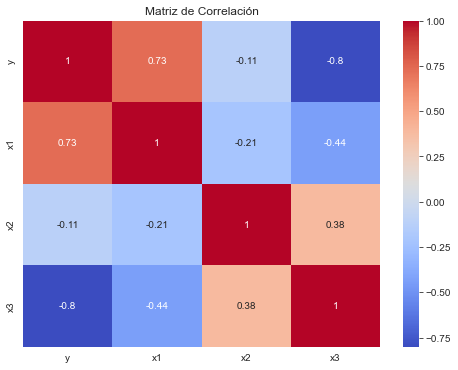

           y        x1        x2        x3
y   1.000000  0.726588 -0.114561 -0.800552
x1  0.726588  1.000000 -0.212667 -0.437739
x2 -0.114561 -0.212667  1.000000  0.381384
x3 -0.800552 -0.437739  0.381384  1.000000


In [36]:
correlation_matrix = base.corr()

# Visualizar la matriz (opcional)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Imprimir la matriz de correlación
print(correlation_matrix)

# $$\color{orange}{\text{MODELO 1}}$$

In [4]:
#  estimación y validación de regresión

# Iniciamos el proceso de estimación de los coeficientes del modelo de regresion simple lineal
X = pd.DataFrame({'beta0' : np.ones(base.shape[0]), 'beta1' : base['x1'], 'beta2' : base['x2'], 'beta3' : base['x3']})
#diccionario Lave : valor
# creamos el término independiente $\beta_0$ agregando una columna de 'unos'

# Definimos la variable de respuesta extrayéndola
y = base['y']


# opción para sustituir 'X'
#x_c_intercepto = sm.add_constant(X)

# Especificamos el modelo por usar  StatModels por MCO (Ordinary Least Squares)
modelo1= sm.OLS(y, X)

# Ajustamos el modelo
resultado1= modelo1.fit()

# Imprimimos los resultados
print(X)
print(resultado1.summary())

    beta0  beta1  beta2  beta3
0     1.0    7.3    0.0    0.0
1     1.0    8.7    0.0    0.3
2     1.0    8.8    0.7    1.0
3     1.0    8.1    4.0    0.2
4     1.0    9.0    0.5    1.0
5     1.0    8.7    1.5    2.8
6     1.0    9.3    2.1    1.0
7     1.0    7.6    5.1    3.4
8     1.0   10.0    0.0    0.3
9     1.0    8.4    3.7    4.1
10    1.0    9.3    3.6    2.0
11    1.0    7.7    2.8    7.1
12    1.0    9.8    4.2    2.0
13    1.0    7.3    2.5    6.8
14    1.0    8.5    2.0    6.6
15    1.0    9.5    2.5    5.0
16    1.0    7.4    2.8    7.8
17    1.0    7.8    2.8    7.7
18    1.0    7.7    3.0    8.0
19    1.0   10.3    1.7    4.2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     35.28
Date:                Tue, 13 May 

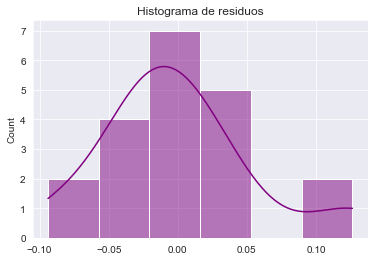

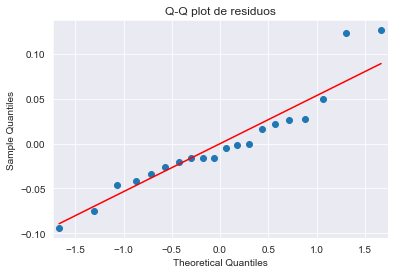

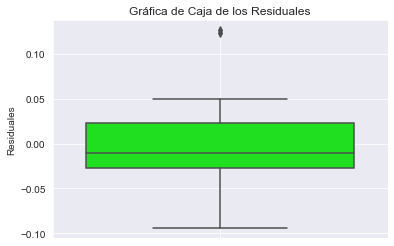

In [30]:
#ANALISIS GRÁFICO DE RESIDUALES
#==============================
#MODELO 1
#==============================

residuos1 = resultado1.resid
# Histograma
sns.histplot(residuos1, kde=True, color="purple")  # kde=True añade una curva de densidad
plt.title('Histograma de residuos')
plt.show()

# Q-Q plot
sm.qqplot(residuos1, line='s')
plt.title('Q-Q plot de residuos')
plt.show()

# Crear la gráfica de caja
plt.figure(figsize=(6, 4))
sns.boxplot(y=residuos1, color="lime")
plt.title('Gráfica de Caja de los Residuales')
plt.ylabel('Residuales')
plt.grid(True)
plt.show()

# $$\color{lime}{\text{MODELO 2}}$$

In [31]:
#==============================
# Estimación de los coeficientes
#==============================
X_2 = pd.DataFrame({'beta0' : np.ones(base.shape[0]), 'beta1' : base['x1']**2, 'beta2' : base['x2']**2, 'beta3' : base['x3']**2})
y_2 = base['y']

#==============================
# Elabolación del modelo
#==============================
modelo2 = sm.OLS(y_2, X_2)

#==============================
# Ajuste del modelo
#==============================
resultado2 = modelo2.fit()
print(X_2)
print(resultado2.summary())

    beta0   beta1  beta2  beta3
0     1.0   53.29   0.00   0.00
1     1.0   75.69   0.00   0.09
2     1.0   77.44   0.49   1.00
3     1.0   65.61  16.00   0.04
4     1.0   81.00   0.25   1.00
5     1.0   75.69   2.25   7.84
6     1.0   86.49   4.41   1.00
7     1.0   57.76  26.01  11.56
8     1.0  100.00   0.00   0.09
9     1.0   70.56  13.69  16.81
10    1.0   86.49  12.96   4.00
11    1.0   59.29   7.84  50.41
12    1.0   96.04  17.64   4.00
13    1.0   53.29   6.25  46.24
14    1.0   72.25   4.00  43.56
15    1.0   90.25   6.25  25.00
16    1.0   54.76   7.84  60.84
17    1.0   60.84   7.84  59.29
18    1.0   59.29   9.00  64.00
19    1.0  106.09   2.89  17.64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     48.50
Date:       

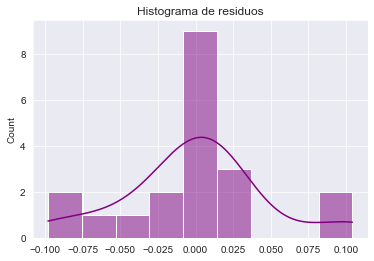

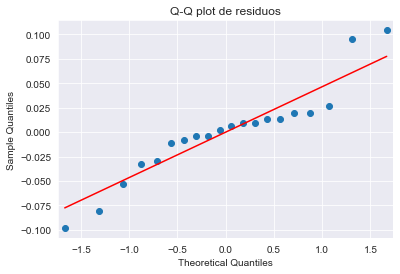

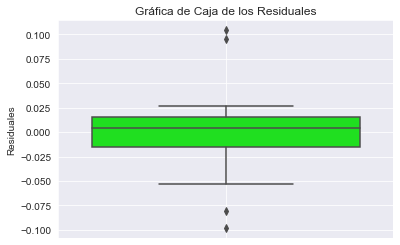

In [32]:
#ANALISIS GRÁFICO DE RESIDUALES
#==============================

residuos2 = resultado2.resid
# Histograma
sns.histplot(residuos2, kde=True, color="purple")  # kde=True añade una curva de densidad
plt.title('Histograma de residuos')
plt.show()

# Q-Q plot
sm.qqplot(residuos2, line='s')
plt.title('Q-Q plot de residuos')
plt.show()

# Crear la gráfica de caja
plt.figure(figsize=(6, 4))
sns.boxplot(y=residuos2, color="lime")
plt.title('Gráfica de Caja de los Residuales')
plt.ylabel('Residuales')
plt.grid(True)
plt.show()

# $$\color{cyan}{\text{MODELO 3}}$$

In [33]:
#==============================
# Estimación de los coeficientes
#==============================
X_3 = pd.DataFrame({'beta0' : np.ones(base.shape[0]), 'beta1' : base['x1']**2, 'beta2' : base['x2']**2, 'beta3' : base['x3']**2
                   , 'beta4' : base['x1']*base['x2'], 'beta5' : base['x1']*base['x3'], 'beta6' : base['x2']*base['x3']})
y_3 = base['y']

#==============================
# Elaboración del modelo
#==============================
modelo3 = sm.OLS(y_3, X_3)

#==============================
# Ajuste del modelo
#==============================
resultado3 = modelo3.fit()

print(X_3)
print(resultado3.summary())

    beta0   beta1  beta2  beta3  beta4  beta5  beta6
0     1.0   53.29   0.00   0.00   0.00   0.00   0.00
1     1.0   75.69   0.00   0.09   0.00   2.61   0.00
2     1.0   77.44   0.49   1.00   6.16   8.80   0.70
3     1.0   65.61  16.00   0.04  32.40   1.62   0.80
4     1.0   81.00   0.25   1.00   4.50   9.00   0.50
5     1.0   75.69   2.25   7.84  13.05  24.36   4.20
6     1.0   86.49   4.41   1.00  19.53   9.30   2.10
7     1.0   57.76  26.01  11.56  38.76  25.84  17.34
8     1.0  100.00   0.00   0.09   0.00   3.00   0.00
9     1.0   70.56  13.69  16.81  31.08  34.44  15.17
10    1.0   86.49  12.96   4.00  33.48  18.60   7.20
11    1.0   59.29   7.84  50.41  21.56  54.67  19.88
12    1.0   96.04  17.64   4.00  41.16  19.60   8.40
13    1.0   53.29   6.25  46.24  18.25  49.64  17.00
14    1.0   72.25   4.00  43.56  17.00  56.10  13.20
15    1.0   90.25   6.25  25.00  23.75  47.50  12.50
16    1.0   54.76   7.84  60.84  20.72  57.72  21.84
17    1.0   60.84   7.84  59.29  21.84  60.06 

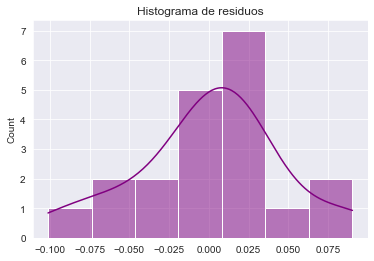

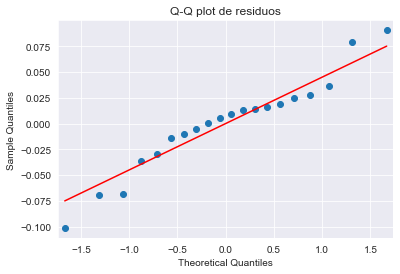

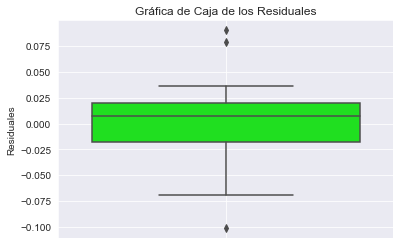

In [34]:
#ANALISIS GRÁFICO DE RESIDUALES
#==============================
#MODELO 1
#==============================

residuos3 = resultado3.resid
# Histograma
sns.histplot(residuos3, kde=True, color="purple")  # kde=True añade una curva de densidad
plt.title('Histograma de residuos')
plt.show()

# Q-Q plot
sm.qqplot(residuos3, line='s')
plt.title('Q-Q plot de residuos')
plt.show()

# Crear la gráfica de caja
plt.figure(figsize=(6, 4))
sns.boxplot(y=residuos3, color="lime")
plt.title('Gráfica de Caja de los Residuales')
plt.ylabel('Residuales')
plt.grid(True)
plt.show()